In [52]:
import pandas as pd
import streamlit as st
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import altair as alt

In [53]:
comments_df = pd.read_csv('./dataset/comments_sentiment.csv')

In [54]:
comments_df = comments_df.dropna(subset=['Comments'])

In [55]:
# Step 1: Preprocessing text (Vectorization menggunakan TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)  # Mengabaikan kata yang terlalu sering muncul
tfidf_matrix = tfidf_vectorizer.fit_transform(comments_df['Comments'])  # Representasi teks dalam bentuk vektor

In [56]:
# Step 2: Melakukan Clustering dengan K-Means
num_clusters = 3  # Tentukan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=3, random_state=42)

In [57]:
# Step 3: Menambahkan label cluster ke DataFrame
comments_df['Cluster'] = kmeans.labels_

In [58]:
# Step 4: Visualisasi hasil clustering
def plot_clusters(data, labels, title="K-Means Clustering"):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
    plt.title(title)
    plt.show()

In [59]:
# Mengurangi dimensionalitas ke 2D untuk visualisasi (menggunakan PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

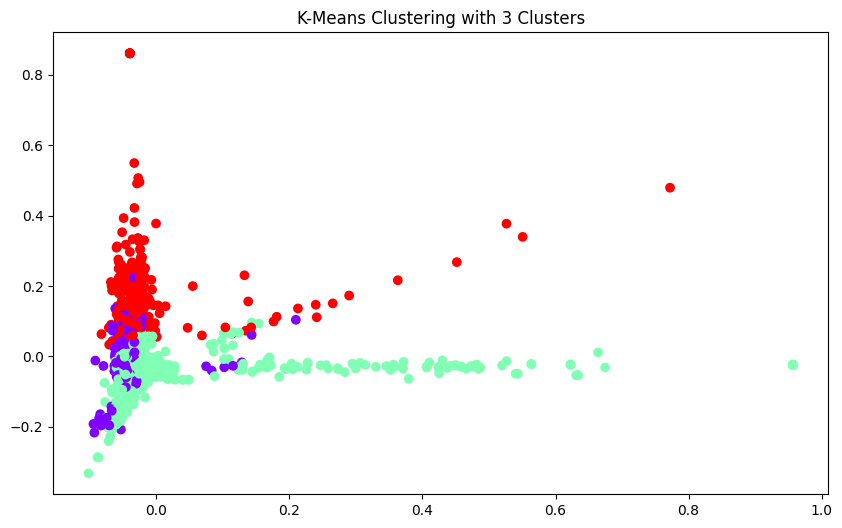

In [60]:
# Menampilkan hasil clustering dalam bentuk scatter plot
plot_clusters(reduced_tfidf, kmeans.labels_, title="K-Means Clustering with 3 Clusters")

In [49]:
# Step 5: Visualisasi dengan Altair
st.title("Clustering Hasil Analisis Sentimen")
st.subheader("Visualisasi Clustering dengan K-Means")

2024-10-13 17:37:40.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 17:37:40.865 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 17:37:40.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 17:37:40.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [50]:
# Membuat visualisasi menggunakan Altair
chart = alt.Chart(comments_df).mark_circle(size=60).encode(
    x='Cluster:N',
    y='like:Q',
    color='Cluster:N',
    tooltip=['Comments', 'Cluster']
).interactive()

st.altair_chart(chart, use_container_width=True)

2024-10-13 17:37:40.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-10-13 17:37:40.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [51]:
# Menampilkan hasil clustering dalam tabel
st.write(comments_df[['Comments', 'Cluster']].head(10))

2024-10-13 17:37:40.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-13 17:37:40.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
